In [1]:
# TODO:
# разбиение на кластеры (групповая выборка)
# построение графика примера номинативной переменной (Occupation)
# построение графика примера ранговой переменной
# построение графика примера дискретной переменной (Num_Bank_Accounts)
# демонстрация св-в среднего
# меры изменчивости
# расписать для чего нужна каждая библиотека
# пройтись по функциям (расписать, что они делают по отдельности)
# почитать про красивый вывод чисел и тд print/format


# 1 Введение  
## 1.2 Генеральная совокупность и выборка.
- Генеральная совокупность (ГС) — совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи
- Репрезентативная выборка – это такая выборка, в которой все основные признаки генеральной совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции или с той же частотой, с которой данный признак выступает в этой генеральной совокупности

Способы формирования выборки
- простая случайная выборка (simple random sample)
- стратифицированная выборка (stratified sample) 
    - разбивка ГС на различные по своей природе страты (группы элементов, которые различаются между собой по определенным признакам)
    - выбор набора элементов из каждой страты
-  групповая выборка (cluster sample)
    - разбивка ГС на кластеры (группы элементов, которые очень похожи между собой)
    - выбор нескольких целых кластеров	

| групповая выборка | стратифицированная выборка |
|---------------------|---------------------|
| Выборка формируется только из нескольких субпопуляций (кластеров)  | Выборка формируется из всех субпопуляций (страт) |
| В пределах кластера элементы должны быть разнородны, тогда как между разными кластерам поддерживается однородность или схожесть| В пределах страты элементы должны быть однородны, а между стратами должна быть разнородность (различия)|
| Схема выборки нужна только для кластеров, попавших в выборку | Должна быть сформирована полная схема выборки для всех стратифицированных субпопуляций |
| Повышает эффективность выборки, уменьшая стоимость | Повышает точность |

In [53]:
# подключение библиотек

from fractions import Fraction # работа с рациональными числами (в виде обыкновенной дроби)
import random                  # генерация случайных значений
import pandas as pd            # для работы с данными
import numpy as np
import scipy                   # это набор математических алгоритмов и вспомогательных функций, созданных на основе Numpy

# Для построения графиков
import matplotlib.pyplot as plt # это пакет для визуализации данных в Python. Pyplot — это модуль в пакете Matplotlib. 
#Его вы часто будете видеть в коде как matplotlib.pyplot. 
#Модуль помогает автоматически создавать оси, фигуры и другие компоненты, не задумываясь о том, как это происходит. 
import matplotlib

import seaborn as sns


In [8]:
# формирование массива рациональных чисел - назовем ее генеральная совокупность

array_number = []
n = 10000                      # кол-во чисел в генеральной совокупности
limit = 1000                   # верхний и нижний предел значений чисел в генеральной совокупности 

for i in range(n):
    array_number.append(random.randint(-limit, limit))

print(array_number[:10])       # вывод первых 10 чисел для примера

[-307, -687, 178, -341, -355, 744, -125, -407, 619, 728]


In [9]:
# формирование простой случайной выборки

# sample - возвращает случайно выбранные элементы из этой последовательности без повторений
sample_size = 1000
random_sample = random.sample(array_number, sample_size) 

print("Случайная выборка ({} элементов) из генеральной совокупности: \n".format(sample_size), random_sample)

Случайная выборка(1000 элементов) из генеральной совокупности: 
 [-138, -673, -932, -654, 915, 332, -676, 535, 75, 730, 658, -135, 932, 669, -325, -777, 732, 92, 550, 304, -521, -854, -521, -611, -78, -829, -469, -850, -702, 702, -667, -252, -477, 461, 883, 408, -718, -272, 790, -622, 112, -178, -939, -811, -790, 649, -913, -366, 905, -809, -587, 719, 647, -72, 372, -986, 182, 829, -201, 669, 908, 472, -63, 725, -954, 756, 445, -676, -351, -411, 6, -130, -882, 757, 599, -276, -595, -356, 557, -219, -344, 221, 567, 490, -410, 224, 540, -191, -638, -564, -189, -506, -97, 9, -984, -388, 852, 336, -744, -327, 30, -600, -453, -236, -612, 126, 714, 618, 446, -204, 564, 280, -14, -162, -618, 136, 547, 536, -358, 784, -568, 377, -380, 750, -612, -206, -361, -498, -94, 362, 641, -568, -461, 63, -399, -134, -900, 569, 912, -509, 428, -134, 570, -753, -463, 125, -342, -236, 157, -336, -233, -347, -1000, -766, 459, -81, 496, 927, -964, 865, -603, 334, -226, -307, 131, -573, 611, -447, 925, -607, -

In [15]:
# формирование стратифицированной выборки
# разобьем на две страты (отрицательные и неотрицаткльные числа)

strata = [[x for x in array_number if x >= 0], [x for x in array_number if x < 0]]

sample_size_per_stratum = 500 # размер выборки из каждой страты
strata_size = 2               # кол-во страт

# Формирование стратифицированной выборки
stratified_sample = []
for stratum in strata:
    stratified_sample.extend(random.sample(stratum, sample_size_per_stratum))

# Вывод стратифицированной выборки
print("Стратифицированная выборка ({} элементов) из рациональных чисел:\n"format(sample_size_per_stratum * strata_size), stratified_sample)

Стратифицированная выборка (1000 элементов) из рациональных чисел:
 [65, 949, 595, 448, 155, 472, 298, 945, 461, 577, 817, 483, 692, 623, 352, 785, 518, 324, 642, 268, 680, 880, 516, 861, 693, 98, 769, 623, 717, 446, 844, 551, 119, 888, 190, 998, 444, 161, 969, 426, 780, 590, 220, 766, 321, 734, 206, 237, 245, 18, 279, 359, 814, 129, 22, 495, 385, 734, 321, 408, 100, 344, 980, 148, 122, 982, 420, 736, 115, 286, 58, 447, 727, 322, 591, 520, 653, 303, 484, 795, 725, 824, 515, 222, 518, 83, 47, 671, 985, 992, 54, 94, 289, 33, 80, 955, 338, 103, 545, 150, 125, 156, 970, 636, 173, 539, 78, 299, 622, 11, 754, 576, 511, 933, 470, 840, 992, 912, 279, 17, 149, 9, 185, 678, 32, 540, 758, 196, 360, 472, 43, 457, 301, 334, 243, 192, 379, 637, 688, 188, 605, 643, 355, 884, 281, 430, 791, 217, 53, 787, 459, 855, 575, 161, 632, 61, 720, 228, 999, 91, 537, 352, 908, 3, 828, 195, 282, 225, 137, 117, 196, 539, 596, 379, 745, 591, 914, 737, 69, 652, 308, 403, 511, 760, 841, 674, 288, 678, 316, 235, 664, 

In [ ]:
# формирование групповой выборки (кластеры)

Характеристики генеральной совокупности:
- Количественные - измеряемые
    - непрерывные
    - дискретные
- Качественные (номинативные) - разделение испытуемых на группы, цифры как маркеры (например: 1 -женщины, 2 – мужчины)  Цифры как имена групп, не для расчетов 
- Ранговые - похоже на номинативные, показатель для сравнения (быстрее/медленнее и т п.)

**Описательная статистика** - раздел статистики, который описывает и систематизирует основные характеристики данных путем использования различных методов, графиков и числовых показателей. 
Цель описательной статистики - предоставить краткое и информативное описание набора данных, чтобы лучше понять их распределение, центральные тенденции, разброс и другие важные свойства.

**Гистограмма частот** - это графическое представление распределения частоты встречаемости значений в наборе данных.

_Предлагаю для интереса начать исследовать набор реальных данных, поэтому дальше я буду работать с данными о кредитной истории различных людей_ 

In [9]:
# загрузка данных из файла XLSX
df = pd.read_excel('CreditScoreData.xlsx')

# вывод данных
df.head()  #df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,323,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,324,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,326,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,207,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard


In [17]:
print('Количество строк {}, количество уникальных строк {}\n'.format(len(df), df['Monthly_Inhand_Salary'].nunique()))

df.info() # df.dtypes - возвращает тип данных каждого столбца
df.shape # возвращает кортеж, показывающий количество строк и столбцов в датафрейме

Количество строк 23929, количество уникальных строк 10982

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  float64
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  

(23929, 28)

In [18]:
df.isna().sum() # функция isna проверяет каждую ячейку и возвращает True для ячеек с отсутствующим значением

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 2526
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age_Months       0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [ ]:
# построение графика примера номинативной переменной (Occupation)

In [ ]:
# построение графика примера ранговой переменной (Credit_Score, Credit_mix) 

# даем каждому Credit_Score, Credit_mix свой ранг и рисуем гистрограмму

In [ ]:
# построение графика примера дискретной переменной (Num_Bank_Accounts)

Text(0, 0.5, 'People')

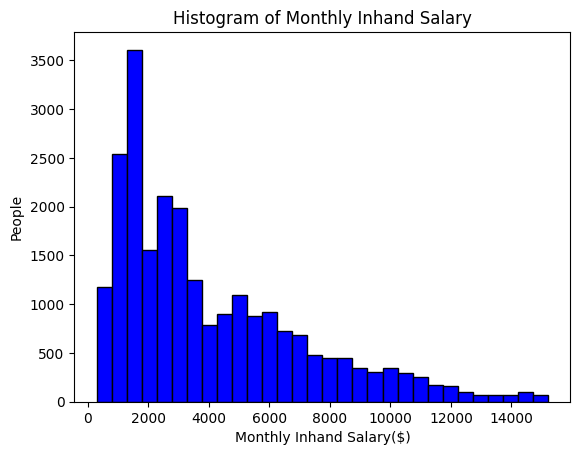

In [45]:
# будем исследовать Monthly_Inhand_Salary - непрырвная переменная

monthly_salary = df['Monthly_Inhand_Salary']

# построим гистограмму
plt.hist(monthly_salary, color = 'blue', edgecolor = 'black', bins = int(150/5)) 
# указываем ширину бина, выраженную в числе бинов
# разбивая этот диапазон на 30 интервалов шириной в 5 единиц

# добавим название
plt.title('Histogram of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary($)')
plt.ylabel('People')

C:\Users\Mi\AppData\Local\Temp\ipykernel_13660\2289773906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monthly_salary, hist=True, kde=False,


Text(0, 0.5, 'Flights')

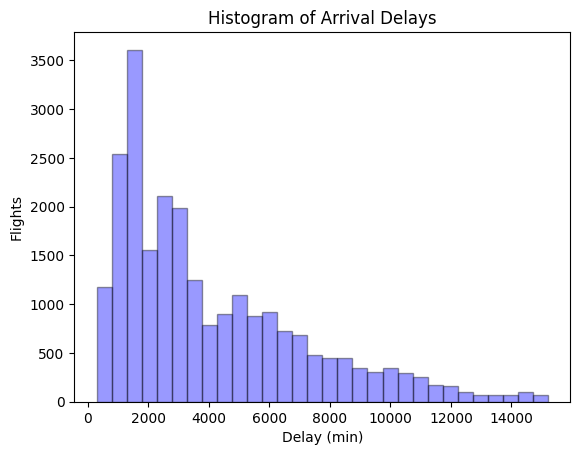

In [43]:

sns.distplot(monthly_salary, hist=True, kde=False, 
             bins=int(150/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights')

__Меры центральной тенденции__:
- Мода (mode) – значение измеряемого признака, которое встречается максимально часто.
- Медиана (median) – значение признака, которое делит упорядоченное (по
возрастанию/убыванию) множество данных пополам. Если в середине 2 значения
оказываются в случае с как с четными числами, находится среднее
значение этих двух цифр.
- Среднее значение – сумма всех значений измеренного признака делится на
количество измеренных значений. (очень чуствительна к выбросам)

__Унимодальное__ - это распределение имеющее только один максимум (т.е. один 'пик'). Типичный
пример - это нормальное распределение  
__Бимодальное (мультимодальное)__ - это распределение, котрая имеет два или несколько максимумов  

*Симметричное/Ассимтричное распределение (по типу гистограммы)*

__Св-ва среднего значения__
$$1) M_{x+c} = M_{x} + c$$
$$2)M_{x*c} = M_{x} * c$$
$$3)\sum (x_i - M_{x}) = 0$$

In [46]:
# выведем статистические данные об этом столбце для представления распределения
monthly_salary.describe().round(2) # round - для округления

# Count  —  количество значений.
# Mean  —  среднее значение.
# Std  —  стандартное отклонение значения.
# Min  —  минимальное значение.
# Max  —  максимальное значение.
# 25%  —  первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
# 50%  —  медиана, означающая, что половина значений в столбце ниже этого значения.
# 75%  —  третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

count    23929.00
mean      4058.28
std       3094.75
min        303.65
25%       1598.55
50%       3004.21
75%       5804.05
max      15204.63
Name: Monthly_Inhand_Salary, dtype: float64

Text(0, 0.5, 'People')

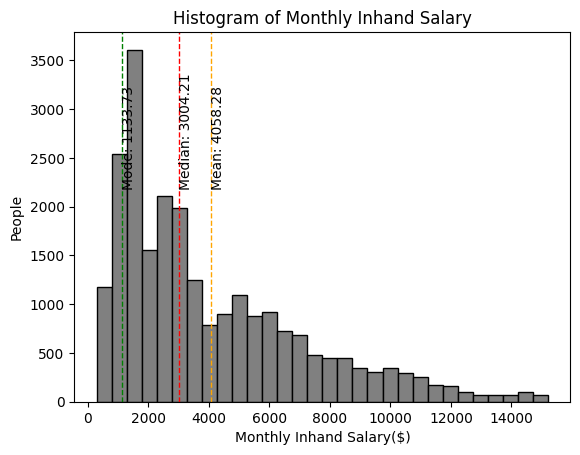

In [67]:
# отобразим на гистрограме моду, медиану и среднее значение

# Получаем данные о медиане, моде и среднем значении
median = np.median(monthly_salary) # можно и через библиотеку scipy
mode,_ = scipy.stats.mode(monthly_salary)
mean = np.mean(monthly_salary) # можно и через библиотеку scipy
# np.nanmedian() и np.nanmean() игнорируются значения NaN

# Построение гистограммы
plt.hist(monthly_salary, color='gray', edgecolor='black', bins=int(150/5))

# Добавляем медиану
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 2200, 'Median: {:.2f}'.format(median), rotation=90)

# Добавляем моду
plt.axvline(mode, color='g', linestyle='dashed', linewidth=1)
plt.text(mode, 2200, 'Mode: {:.2f}'.format(mode), rotation=90)

# Добавляем среднее значение
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=1)
plt.text(mean, 2200, 'Mean: {:.2f}'.format(mean), rotation=90)

plt.title('Histogram of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary($)')
plt.ylabel('People')


Первое св-во среднего значения:
 M(x) = 4058.28, M(x+1000) = 5058.28


C:\Users\Mi\AppData\Local\Temp\ipykernel_13660\3475803829.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(monthly_salary, shade=True, color="g", label="Cyl=4", alpha=.7)
C:\Users\Mi\AppData\Local\Temp\ipykernel_13660\3475803829.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(monthly_salary + 1000, shade=True, color="deeppink", label="Cyl=5", alpha=.7)


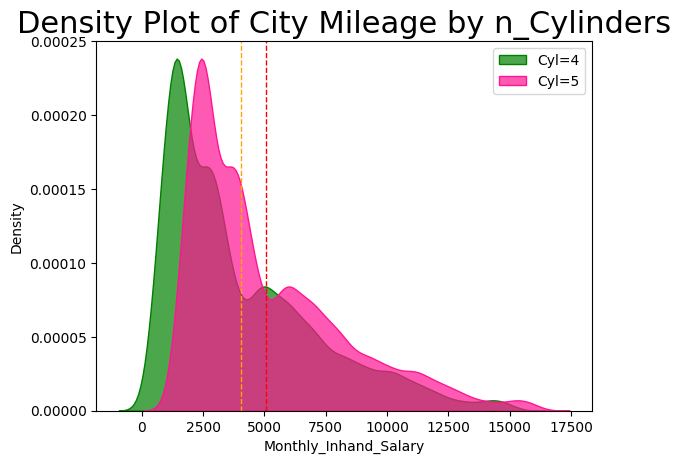

In [84]:
# демонстрация св-в среднего значения

# первое св-во

print("Первое св-во среднего значения:\n M(x) = {}, M(x+1000) = {}".format(round(np.mean(monthly_salary), 2), round(np.mean(monthly_salary + 1000), 2)))
print()# Объяснение почему так

# построим графики распределения для множества значений x и x+1000
# строим графики плотности для обоих случаев и отображаем на них среднее значение для каждого 

sns.kdeplot(monthly_salary, shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(monthly_salary + 1000, shade=True, color="deeppink", label="Cyl=5", alpha=.7)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary), 2), color='orange', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary)), rotation=90)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary + 1000), 2), color='red', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary + 1000), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary + 1000)), rotation=90)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()


__График плотности__
Что это такое и с чем его едят?

Второое св-во среднего значения:
 M(x) = 4058.28, M(x*2) = 8116.57


C:\Users\Mi\AppData\Local\Temp\ipykernel_13660\3954051089.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(monthly_salary, shade=True, color="g", label="Cyl=4", alpha=.7)
C:\Users\Mi\AppData\Local\Temp\ipykernel_13660\3954051089.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(monthly_salary *2, shade=True, color="deeppink", label="Cyl=5", alpha=.7)


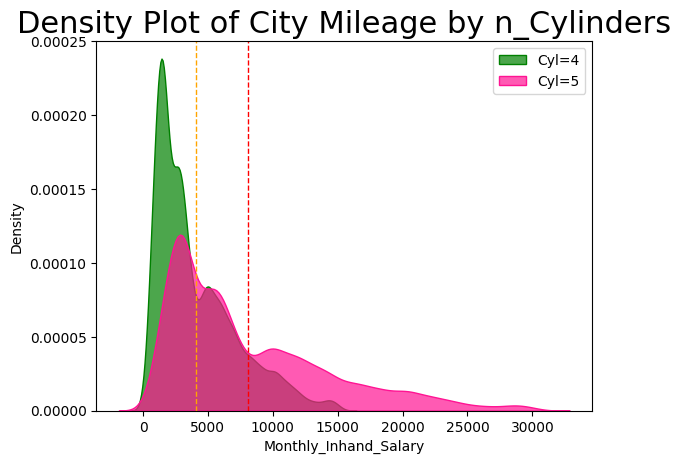

In [85]:
print("Второое св-во среднего значения:\n M(x) = {}, M(x*2) = {}".format(round(np.mean(monthly_salary), 2), round(np.mean(monthly_salary *2), 2)))
print() # Объяснение почему так

# построим графики распределения для множества значений x и x+1000
# строим графики плотности для обоих случаев и отображаем на них среднее значение для каждого 

sns.kdeplot(monthly_salary, shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(monthly_salary *2, shade=True, color="deeppink", label="Cyl=5", alpha=.7)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary), 2), color='orange', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary)), rotation=90)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary * 2), 2), color='red', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary + 1000), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary + 1000)), rotation=90)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()

In [88]:
# Третий признак
sum_ = 0
for i in monthly_salary:
    w = i - np.mean(monthly_salary)
    sum_ = w + sum_
    
print('sum( X(i) - average ) =', sum_)

# почему получился не ноль????

sum( X(i) - average ) = -5.667061486747116e-09


__Меры изменчивости__
- Размах - разность между максимальным и минимальным значениям выборки (чувствителен к выбросам).
- Дисперсия - это мера изменчивости данных. Чем больше дисперсия, тем больше разброс значений относительно среднего.  

для генеральной совокупности
$$D = \frac{\sum (x_i - M_{x})^2}{n}$$
для выборки
$$D = \frac{\sum (x_i - M_{x})^2}{(n-1)}$$
*Среднеквадратическое отклонение*
$$σ=\sqrt{D}$$
*Важно отменить, что среднеквадратическое отклонение для выборки обозначают по другому, sd - standart deviation*

__Св-ва дисперсии__
$$1) D_{x+c} = D_{x}$$
$$2)D_{x*c} = D_{x} + c^2$$

In [90]:
# The name of the function comes from the acronym for ‘peak to peak’.
print(f'Размах: {np.ptp(monthly_salary):.2f}')
print(f'Дисперсия: {np.var(monthly_salary, ddof=1):.2f}')

# ddof - Delta Degrees of Freedom
print(f'Стандартное отклонение: {np.std(monthly_salary, ddof=1):.2f}')


Размах: 14900.99
Дисперсия: 9577489.17
Стандартное отклонение: 3094.75


Можно заметить, что по размаху сложно сказать о изменчивости данных (из-за того, что у нас есть очень большие знпчения в выборке)
Стандартное отклонение же показывает более реалистичные значения (на нее не так сильно влияют выбросы)


In [ ]:
# Демонстрация св-в дисперсии
# первое св-во

print("Первое св-во дисперсии:\n M(x) = {}, M(x+1000) = {}".format(round(np.mean(monthly_salary), 2), round(np.mean(monthly_salary + 1000), 2)))
print()# Объяснение почему так

# построим графики распределения для множества значений x и x+1000
# строим графики плотности для обоих случаев и отображаем на них среднее значение для каждого 

sns.kdeplot(monthly_salary, shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(monthly_salary + 1000, shade=True, color="deeppink", label="Cyl=5", alpha=.7)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary), 2), color='orange', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary)), rotation=90)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary + 1000), 2), color='red', linestyle='dashed', linewidth=1)
#plt.text(np.mean(monthly_salary + 1000), 0.2200, 'Mode: {:.2f}'.format(np.mean(monthly_salary + 1000)), rotation=90)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()


__Квартили распределения__  
Квантили?
__Квартили__ - это три точки(значения признака), которые делят упорядочное множество данных на 4 равные части.

Квартили и inter quartile range используют, чтобы оценить наличие выбросов. Алгоритм расчета - посчитали квартили, посчитали разницу между ними, вычислили теоретический максимум и минимум, сравнили с имеющимся и выяснили есть ли у вас выбросы и сколько их. Если много, то нужно анализировать и решать брать ли их в выборку или нет.

__Box plot__ - такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

In [ ]:
# расчет квартилей

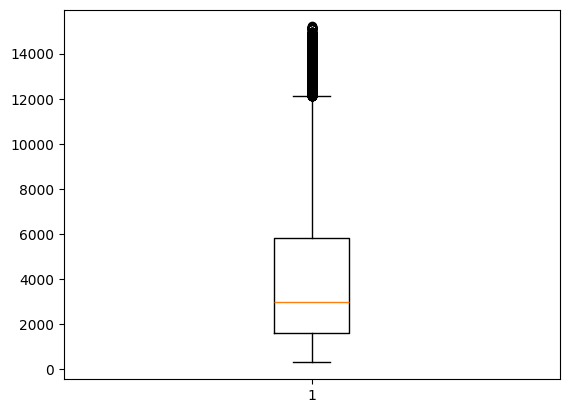

In [94]:
# построение графика boxplot

plt.boxplot(monthly_salary, showfliers=1)
plt.show()

Нормальное распределение
Нормальное распределение
Коротко

Унимодально
Симметрично
Отклонения наблюдений от среднего подчиняются определённому вероятностному закону
Подробно

Нормальное распределение возникает в результате воздействия множества факторов, вклад каждого из которых очень мал.

Для облегчения этого восприятия в 1873 году Фрэнсис Гальтон сделал устройство, которое в последствии назвали Доской Галтона (или квинкункс). Суть простая: сверху по середине подаются шарики, которые при прохождении нескольких уровней (например, 10-ти) на каждом уровне сталкиваются с препятствием, и при каждом столкновении отскакивают либо влево, либо вправо (с равной вероятностью).

Как вы догадываетесь, результатом прохождения - это распределение, стремящееся к нормальному!

Стандартизация

Правило двух и трех сигм, использование стандартизации